In [1]:
import pandas as pd
import os, sys
import os.path
import argparse
import shutil
import numpy as np
from glob import iglob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import seaborn and change a few global variables to
# alter the aesthetic of the below plots
import seaborn as sns
sns.set(
    font_scale=1, # make the font larger; default is pretty small
    style='darkgrid', # make the background white with black lines
    palette='colorblind' # a color palette that is colorblind friendly!
)
matplotlib.rcParams["figure.figsize"] = [12.0, 12.0]

def parse_score_file(filename):
    try:
        score_file = open(filename).readlines()
    except FileNotFoundError:
        print("{} not found!".format(filename))
        sys.exit(1)

    headers = score_file[1].split()[1:]
    score_data = [line.split()[1:] for line in score_file[2:]]
    return headers, score_data

def process_data(data):
    headers, score_data = parse_score_file(data)
    scores = pd.DataFrame(score_data, columns=headers, dtype=float)
    scores.dropna(inplace=True)
    scores['score_per_res'] = scores['total_score'] / 3784
    scores['%score_deviation'] = - ( scores['score_per_res'] - scores['score_per_res'].mean() ) / scores['score_per_res'].mean()
    scores[['total_score', 'score_per_res', '%score_deviation' ]].head()
    scores['uhb2'].describe()
    scores['Rotation_angle'] = scores['description'][0:2]
    scores['Rotation_angle'] = scores['description'].apply(lambda s:s.split('_')[4])
    scores['Rotation_angle_float'] = scores['Rotation_angle'].astype(float)
    scores['Rotation_angle_float_rad'] = scores['Rotation_angle_float']* np.pi / 180
    scores.groupby('Rotation_angle_float', as_index=False).mean()
    scores['total_score_mean'] = scores['total_score'].astype(float)
    scores['total_score_sd'] = scores['total_score'].astype(float)
    scores['score_per_res_mean'] = scores['score_per_res'].astype(float)
    scores['score_per_res_sd'] = scores['score_per_res'].astype(float)
    scores['%score_deviation_mean'] = scores['%score_deviation'].astype(float)
    scores['%score_deviation_sd'] = scores['%score_deviation'].astype(float)
    scores['uhb_sd'] = scores['uhb'].astype(float)
    scores['uhb2_sd'] = scores['uhb2'].astype(float)
    scores2 = scores.groupby(['Rotation_angle_float']).agg({'total_score_mean': 'mean', 'total_score_sd': 'std','score_per_res_mean': 'mean', 'score_per_res_sd': 'std','%score_deviation_mean': 'mean', '%score_deviation_sd': 'std','uhb': 'mean','uhb_sd': 'std', 'uhb2': 'mean','uhb2_sd': 'std'})
    scores2 = scores2.reset_index()
    scores2['Rotation_angle_float_rad'] = scores2['Rotation_angle_float']* np.pi / 180
    sorted_scores = scores2.sort_values('Rotation_angle_float', ascending=True)
    sorted_scores_0_120 = sorted_scores.iloc[0:240, :]
    sorted_scores_120_240 = sorted_scores_0_120.copy()
    sorted_scores_120_240['Rotation_angle_float'] = sorted_scores_120_240['Rotation_angle_float'] + 120
    sorted_scores_240_360 = sorted_scores_120_240.copy()
    sorted_scores_240_360['Rotation_angle_float'] = sorted_scores_240_360['Rotation_angle_float'] + 120
    sorted_scores_360 = pd.concat([sorted_scores_0_120, sorted_scores_120_240, sorted_scores_240_360,], axis=0)
    sorted_scores_360['Rotation_angle_float_rad'] = sorted_scores_360['Rotation_angle_float']* np.pi / 180
    return sorted_scores_360

def process_data2(data):
    headers, score_data = parse_score_file(data)
    scores = pd.DataFrame(score_data, columns=headers, dtype=float)
    scores.dropna(inplace=True)
    scores['score_per_res'] = scores['total_score'] / 3784
    scores['%score_deviation'] = - ( scores['score_per_res'] - scores['score_per_res'].mean() ) / scores['score_per_res'].mean()
    scores[['total_score', 'score_per_res', '%score_deviation' ]].head()
    scores['uhb2'].describe()
    scores['Rotation_angle'] = scores['description'][0:2]
    scores['Rotation_angle'] = scores['description'].apply(lambda s:s.split('_')[5])
    scores['Rotation_angle_float'] = scores['Rotation_angle'].astype(float)
    scores['Rotation_angle_float_rad'] = scores['Rotation_angle_float']* np.pi / 180
    scores.groupby('Rotation_angle_float', as_index=False).mean()
    scores['total_score_mean'] = scores['total_score'].astype(float)
    scores['total_score_sd'] = scores['total_score'].astype(float)
    scores['score_per_res_mean'] = scores['score_per_res'].astype(float)
    scores['score_per_res_sd'] = scores['score_per_res'].astype(float)
    scores['%score_deviation_mean'] = scores['%score_deviation'].astype(float)
    scores['%score_deviation_sd'] = scores['%score_deviation'].astype(float)
    scores['uhb_sd'] = scores['uhb'].astype(float)
    scores['uhb2_sd'] = scores['uhb2'].astype(float)
    scores2 = scores.groupby(['Rotation_angle_float']).agg({'total_score_mean': 'mean', 'total_score_sd': 'std','score_per_res_mean': 'mean', 'score_per_res_sd': 'std','%score_deviation_mean': 'mean', '%score_deviation_sd': 'std','uhb': 'mean','uhb_sd': 'std', 'uhb2': 'mean','uhb2_sd': 'std'})
    scores2 = scores2.reset_index()
    scores2['Rotation_angle_float_rad'] = scores2['Rotation_angle_float']* np.pi / 180
    sorted_scores = scores2.sort_values('Rotation_angle_float', ascending=True)
    return sorted_scores

def process_data3(data):
    headers, score_data = parse_score_file(data)
    scores = pd.DataFrame(score_data, columns=headers, dtype=float)
    scores.dropna(inplace=True)
    scores['score_per_res'] = scores['total_score'] / 3784
    scores['%score_deviation'] = - ( scores['score_per_res'] - scores['score_per_res'].mean() ) / scores['score_per_res'].mean()
    scores[['total_score', 'score_per_res', '%score_deviation' ]].head()
    scores['uhb2'].describe()
    scores['Rotation_angle'] = scores['description'][0:2]
    scores['Rotation_angle'] = scores['description'].apply(lambda s:s.split('_')[4])
    scores['Rotation_angle_float'] = scores['Rotation_angle'].astype(float)
    scores['Rotation_angle_float_rad'] = scores['Rotation_angle_float']* np.pi / 180
    scores.groupby('Rotation_angle_float', as_index=False).mean()
    scores['total_score_mean'] = scores['total_score'].astype(float)
    scores['total_score_sd'] = scores['total_score'].astype(float)
    scores['score_per_res_mean'] = scores['score_per_res'].astype(float)
    scores['score_per_res_sd'] = scores['score_per_res'].astype(float)
    scores['%score_deviation_mean'] = scores['%score_deviation'].astype(float)
    scores['%score_deviation_sd'] = scores['%score_deviation'].astype(float)
    scores['uhb_sd'] = scores['uhb'].astype(float)
    scores['uhb2_sd'] = scores['uhb2'].astype(float)
    scores2 = scores.groupby(['Rotation_angle_float']).agg({'total_score_mean': 'mean', 'total_score_sd': 'std','score_per_res_mean': 'mean', 'score_per_res_sd': 'std','%score_deviation_mean': 'mean', '%score_deviation_sd': 'std','uhb': 'mean','uhb_sd': 'std', 'uhb2': 'mean','uhb2_sd': 'std'})
    scores2 = scores2.reset_index()
    scores2['Rotation_angle_float_rad'] = scores2['Rotation_angle_float']* np.pi / 180
    sorted_scores = scores2.sort_values('Rotation_angle_float', ascending=True)
    return sorted_scores


scores_D3_C3 = process_data2("D3-C3_scores.sc")
scores_C3_C3_547112 = process_data("C3-C3_scores_547112.sc")
scores_D8_C4 = pd.read_csv('D8-C4_scores.sc')
scores_C5_C3_2412 = process_data("C5-C3_2412_scores.sc")
scores_C5_C3_3250 = process_data("C5-C3_3250_scores.sc")
scores_C8_C4 = process_data2("C8-C4_scores.sc")

scores_D3_C3.to_csv('D3_C3.csv')
scores_C3_C3_547112.to_csv('C3_C3.csv')
scores_D8_C4.to_csv('D8_C4.csv')
scores_C5_C3_2412.to_csv('C5_C3_2412.csv')
scores_C5_C3_3250.to_csv('C5_C3_3250.csv')
scores_C8_C4.to_csv('C8_C4.csv')


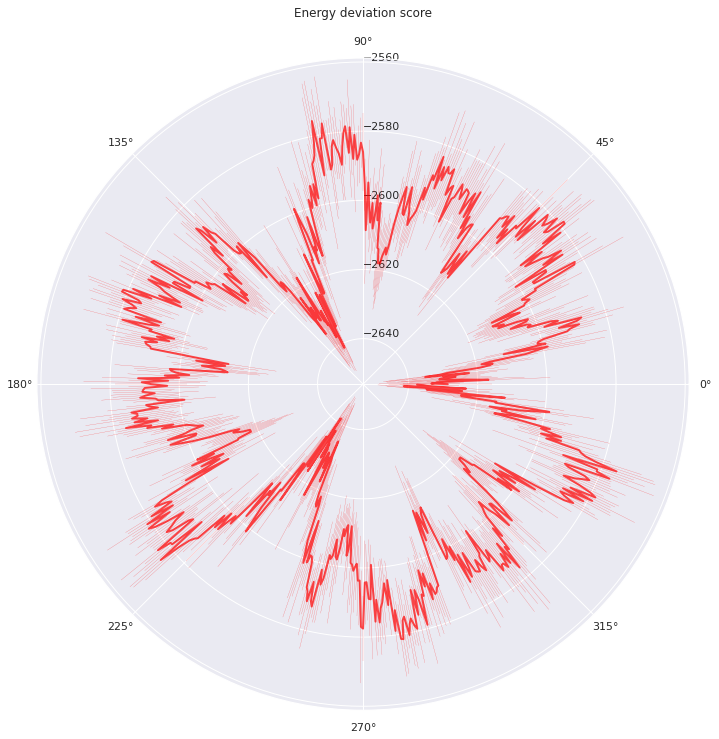

In [2]:
angle_ticks = np.multiply([0.5, 1.0, 1.5, 1.75, 2.0], np.pi)

ax = plt.subplot(111, polar=True)

ax.errorbar(scores_C3_C3_547112['Rotation_angle_float_rad'], scores_C3_C3_547112['total_score_mean'], yerr = scores_C3_C3_547112['total_score_sd'], capsize=0, color='red', linewidth=2, elinewidth = 0.2,alpha=0.7)

#ax.set_rmax(0.005)
#ax.set_rmin(-0.0045)

ax.set_rlabel_position(90)
ax.set_title("Energy deviation score", va='bottom')
matplotlib.rcParams["figure.figsize"] = [12.0, 12.0]
##plt.savefig('energy_polar_deviation_score__.svg',)
plt.show()

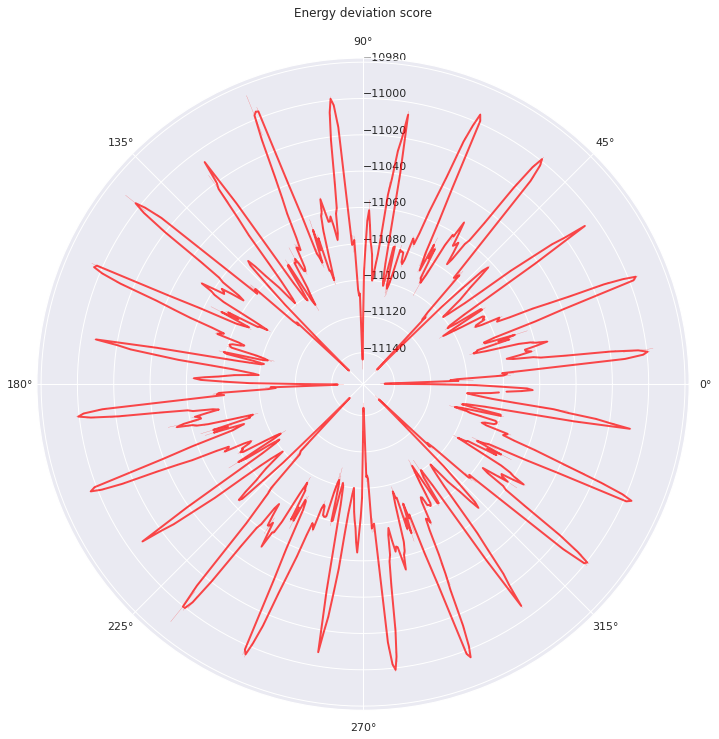

In [3]:
angle_ticks = np.multiply([0.5, 1.0, 1.5, 1.75, 2.0], np.pi)
ax = plt.subplot(111, polar=True)

ax.errorbar(scores_D8_C4['Rotation_angle_float_rad'], scores_D8_C4['total_score_mean'], yerr = scores_D8_C4['total_score_sd'], capsize=0, color='red', linewidth=2, elinewidth = 0.2,alpha=0.7)

# ok ax.errorbar(scores_C5_C3_2412['Rotation_angle_float_rad'], scores_C5_C3_2412['score_per_res_mean'], yerr = scores_C5_C3_2412['score_per_res_sd'], capsize=0, color='red', linewidth=2, elinewidth = 0.2,alpha=0.7)

# ok ax.errorbar(scores_C5_C3_3250['Rotation_angle_float_rad'], scores_C5_C3_3250['score_per_res_mean'], yerr = scores_C5_C3_3250['score_per_res_sd'], capsize=0, color='red', linewidth=2, elinewidth = 0.2,alpha=0.7)

#ax.set_rmax(0.005)
#ax.set_rmin(-0.0045)

ax.set_rlabel_position(90)
ax.set_title("Energy deviation score", va='bottom')
matplotlib.rcParams["figure.figsize"] = [12.0, 12.0]
##plt.savefig('energy_polar_deviation_score__.svg',)
plt.show()

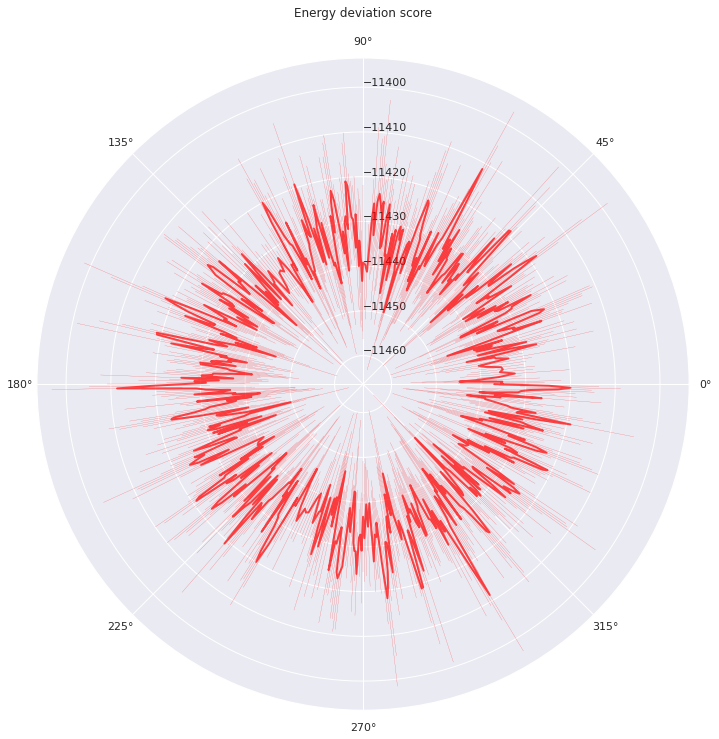

In [4]:
angle_ticks = np.multiply([0.5, 1.0, 1.5, 1.75, 2.0], np.pi)
ax = plt.subplot(111, polar=True)

ax.errorbar(scores_C5_C3_2412['Rotation_angle_float_rad'], scores_C5_C3_2412['total_score_mean'], yerr = scores_C5_C3_2412['total_score_sd'], capsize=0, color='red', linewidth=2, elinewidth = 0.2,alpha=0.7)

#ax.set_rmax(0.005)
#ax.set_rmin(-0.0045)

ax.set_rlabel_position(90)
ax.set_title("Energy deviation score", va='bottom')
matplotlib.rcParams["figure.figsize"] = [12.0, 12.0]
##plt.savefig('energy_polar_deviation_score__.svg',)
plt.show()

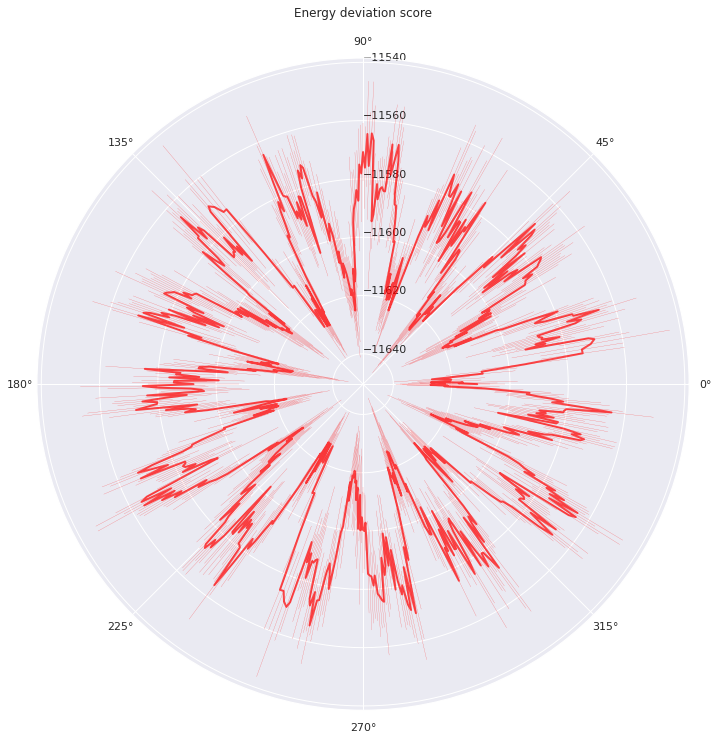

In [5]:
angle_ticks = np.multiply([0.5, 1.0, 1.5, 1.75, 2.0], np.pi)
ax = plt.subplot(111, polar=True)

ax.errorbar(scores_C5_C3_3250['Rotation_angle_float_rad'], scores_C5_C3_3250['total_score_mean'], yerr = scores_C5_C3_3250['total_score_sd'], capsize=0, color='red', linewidth=2, elinewidth = 0.2,alpha=0.7)

#ax.set_rmax(0.005)
#ax.set_rmin(-0.0045)

ax.set_rlabel_position(90)
ax.set_title("Energy deviation score", va='bottom')
matplotlib.rcParams["figure.figsize"] = [12.0, 12.0]
##plt.savefig('energy_polar_deviation_score__.svg',)
plt.show()


#ax.errorbar(scores_D3_C3['Rotation_angle_float_rad'], scores_D3_C3['total_score_mean'], yerr = scores_D3_C3['total_score_sd'], capsize=0, color='red', linewidth=2, elinewidth = 0.2,alpha=0.7)
#ax.errorbar(scores_C3_C3_54736['Rotation_angle_float_rad'], scores_C3_C3_54736['score_per_res_mean'], yerr = scores_C3_C3_54736['score_per_res_sd'], capsize=0, color='red', linewidth=2, elinewidth = 0.2,alpha=0.7)
#ax.errorbar(scores_C8_C4['Rotation_angle_float_rad'], scores_C8_C4['score_per_res_mean'], yerr = scores_C8_C4['score_per_res_sd'], capsize=0, color='red', linewidth=2, elinewidth = 0.2,alpha=0.7)

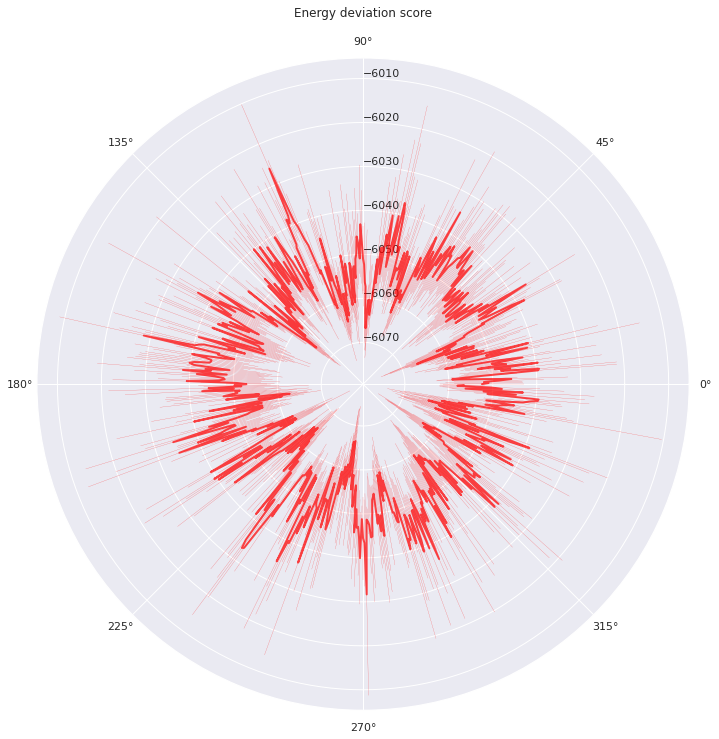

In [6]:
angle_ticks = np.multiply([0.5, 1.0, 1.5, 1.75, 2.0], np.pi)
ax = plt.subplot(111, polar=True)

ax.errorbar(scores_D3_C3['Rotation_angle_float_rad'], scores_D3_C3['total_score_mean'], yerr = scores_D3_C3['total_score_sd'], capsize=0, color='red', linewidth=2, elinewidth = 0.2,alpha=0.7)
#ax.errorbar(scores_C3_C3_54736['Rotation_angle_float_rad'], scores_C3_C3_54736['score_per_res_mean'], yerr = scores_C3_C3_54736['score_per_res_sd'], capsize=0, color='red', linewidth=2, elinewidth = 0.2,alpha=0.7)
#ax.errorbar(scores_C8_C4['Rotation_angle_float_rad'], scores_C8_C4['score_per_res_mean'], yerr = scores_C8_C4['score_per_res_sd'], capsize=0, color='red', linewidth=2, elinewidth = 0.2,alpha=0.7)

ax.set_rlabel_position(90)
ax.set_title("Energy deviation score", va='bottom')
matplotlib.rcParams["figure.figsize"] = [12.0, 12.0]
##plt.savefig('energy_polar_deviation_score__D8C24.svg',)
plt.show()




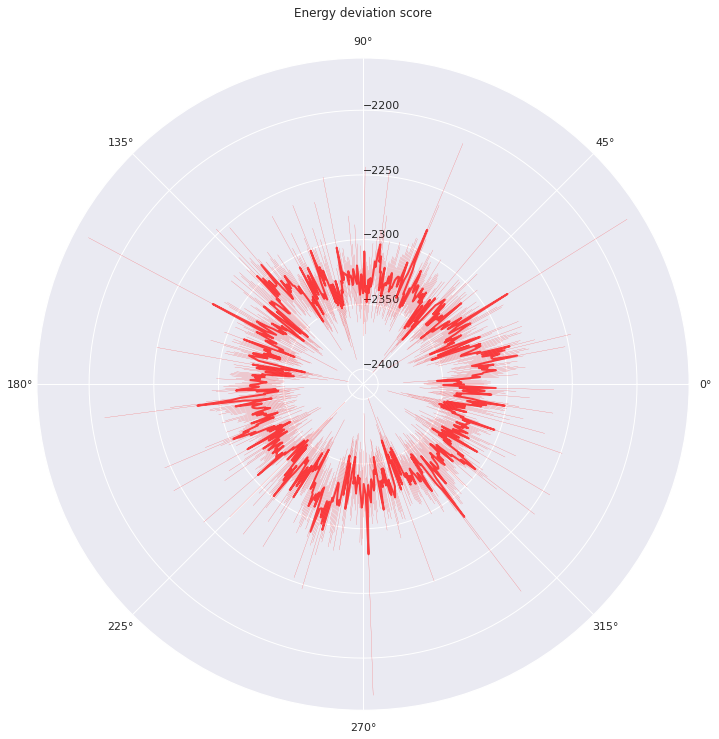

In [7]:
headersB, score_dataB = parse_score_file("C3-C3_scores_54736.sc")
scoresB = pd.DataFrame(score_dataB, columns=headersB, dtype=float)
scoresB.dropna(inplace=True)
scoresB = scoresB[(scoresB['total_score'] < -2000 )]
scoresB['score_per_res'] = scoresB['total_score'] / 684
scoresB['%score_deviation'] = - ( scoresB['score_per_res'] - scoresB['score_per_res'].mean() ) / scoresB['score_per_res'].mean()
scoresB[['total_score', 'score_per_res', '%score_deviation' ]].head()
scoresB['uhb2'].describe()
scoresB['Rotation_angle'] = scoresB['description'][0:2]
scoresB['Rotation_angle'] = scoresB['description'].apply(lambda s:s.split('_')[4])
scoresB['Rotation_angle_float'] = scoresB['Rotation_angle'].astype(float)
scoresB['Rotation_angle_float_rad'] = scoresB['Rotation_angle_float']* 3.14 / 180
scoresB.groupby('Rotation_angle_float', as_index=False).mean()
scoresB['total_score_mean'] = scoresB['total_score'].astype(float)
scoresB['total_score_sd'] = scoresB['total_score'].astype(float)
scoresB['score_per_res_mean'] = scoresB['score_per_res'].astype(float)
scoresB['score_per_res_sd'] = scoresB['score_per_res'].astype(float)
scoresB['%score_deviation_mean'] = scoresB['%score_deviation'].astype(float)
scoresB['%score_deviation_sd'] = scoresB['%score_deviation'].astype(float)
scoresB['uhb_sd'] = scoresB['uhb'].astype(float)
scoresB['uhb2_sd'] = scoresB['uhb2'].astype(float)
scores2B = scoresB.groupby(['Rotation_angle_float']).agg({'total_score_mean': 'mean', 'total_score_sd': 'std','score_per_res_mean': 'mean', 'score_per_res_sd': 'std','%score_deviation_mean': 'mean', '%score_deviation_sd': 'std','uhb': 'mean','uhb_sd': 'std', 'uhb2': 'mean','uhb2_sd': 'std'})
scores2B = scores2B.reset_index()
scores2B['Rotation_angle_float_rad'] = scores2B['Rotation_angle_float']* np.pi / 180
sorted_scoresB = scores2B.sort_values('Rotation_angle_float', ascending=True)
sorted_scores_0_120B = sorted_scoresB.iloc[0:240, :]
sorted_scores_120_240B = sorted_scores_0_120B.copy()
sorted_scores_120_240B['Rotation_angle_float'] = sorted_scores_120_240B['Rotation_angle_float'] + 120
sorted_scores_240_360B = sorted_scores_120_240B.copy()
sorted_scores_240_360B['Rotation_angle_float'] = sorted_scores_240_360B['Rotation_angle_float'] + 120

scores_C3_C3_54736 = pd.concat([sorted_scores_0_120B, sorted_scores_120_240B, sorted_scores_240_360B,], axis=0)
scores_C3_C3_54736['Rotation_angle_float_rad'] = scores_C3_C3_54736['Rotation_angle_float']* 3.14 / 180

angle_ticks = np.multiply([0.5, 1.0, 1.5, 1.75, 2.0], np.pi)
ax = plt.subplot(111, polar=True)

ax.errorbar(scores_C3_C3_54736['Rotation_angle_float_rad'], scores_C3_C3_54736['total_score_mean'], yerr = scores_C3_C3_54736['total_score_sd'], capsize=0, color='red', linewidth=2, elinewidth = 0.2,alpha=0.7)

ax.set_rlabel_position(90)
ax.set_title("Energy deviation score", va='bottom')
matplotlib.rcParams["figure.figsize"] = [12.0, 12.0]
##plt.savefig('energy_polar_deviation_score__D8C24.svg',)
plt.show()

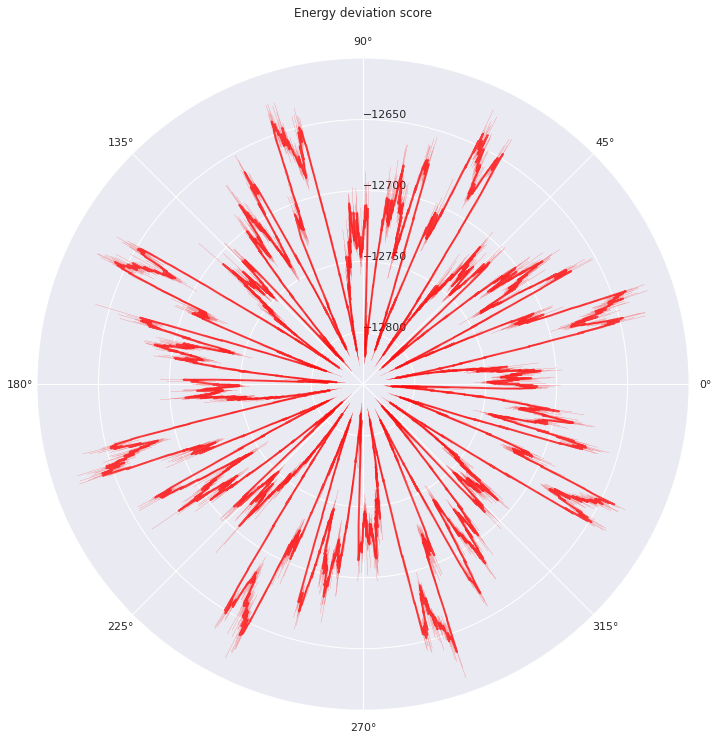

In [8]:
angle_ticks = np.multiply([0.5, 1.0, 1.5, 1.75, 2.0], np.pi)
ax = plt.subplot(111, polar=True)

ax.errorbar(scores_C8_C4['Rotation_angle_float_rad'], scores_C8_C4['total_score_mean'], yerr = scores_C8_C4['total_score_sd'], capsize=0, color='red', linewidth=2, elinewidth = 0.2,alpha=0.7)

ax.set_rlabel_position(90)
ax.set_title("Energy deviation score", va='bottom')
matplotlib.rcParams["figure.figsize"] = [12.0, 12.0]
##plt.savefig('energy_polar_deviation_score__D8C24.svg',)
plt.show()

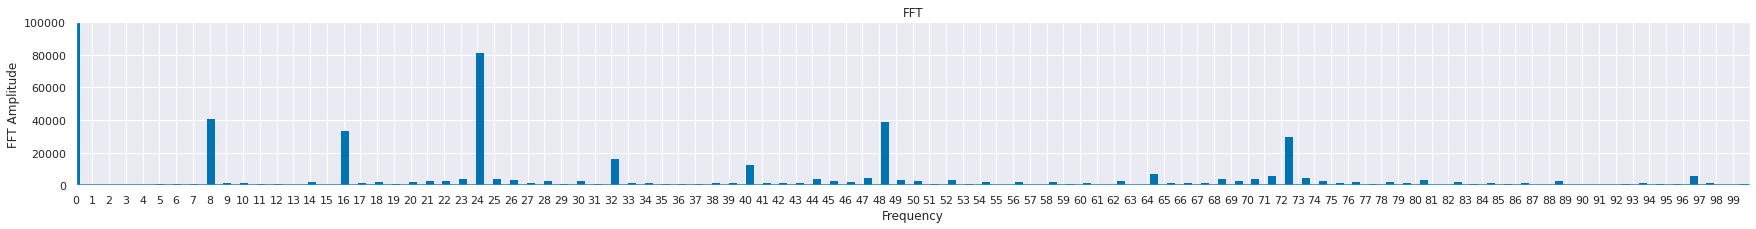

In [23]:
from numpy.fft import fft, ifft

# FFT the signal
fft_signal_C8C4 = np.array(scores_C8_C4['total_score_mean'])
sig_fft_C8C4 = fft(fft_signal_C8C4)
N = len(sig_fft_C8C4)
n = np.arange(N)
# get the sampling rate
sr = 3600
#sampling interval
T = N/sr
freq_C8C4 = n/T 

# plot the FFT amplitude
plt.figure(figsize = (30,3))
markerline, stemlines, baseline = plt.stem(freq_C8C4, np.abs(sig_fft_C8C4), 'b',markerfmt=" ", basefmt="-b", use_line_collection = "True")
plt.setp(stemlines, 'linewidth', 8)
plt.title('FFT')
plt.xlim(0, 100)
plt.ylim(0, 0.1e6)
plt.xticks(np.arange(min(freq_C8C4), 100, 1.0))
plt.xlabel('Frequency')
plt.ylabel('FFT Amplitude')
plt.savefig('FFT_C8C4.png')
plt.show()

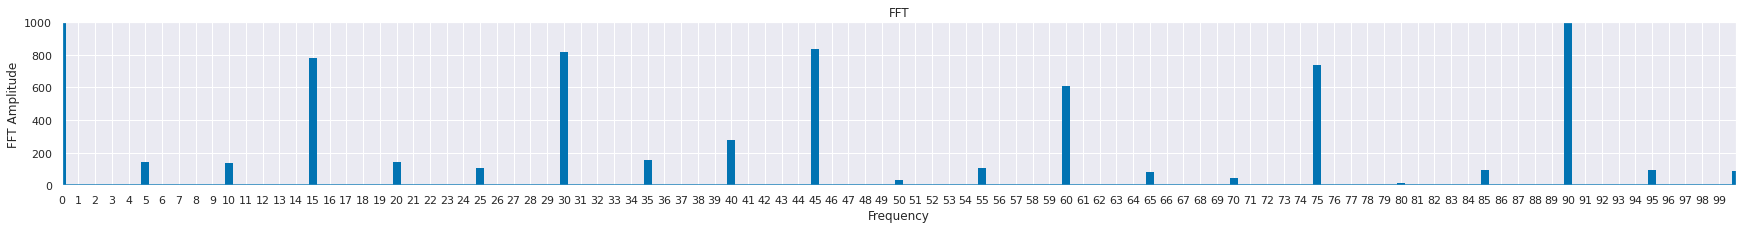

In [24]:
from numpy.fft import fft, ifft

# FFT the signal
fft_signal_D3C3 = np.array(scores_D3_C3['total_score_mean'])
sig_fft_D3C3 = fft(fft_signal_D3C3)
N = len(sig_fft_D3C3)
n = np.arange(N)
# get the sampling rate
sr = 3600
#sampling interval
T = N/sr
freq_D3C3 = n/T 

# plot the FFT amplitude
plt.figure(figsize = (30,3))
markerline, stemlines, baseline = plt.stem(freq_D3C3, np.abs(sig_fft_D3C3), 'b',markerfmt=" ", basefmt="-b", use_line_collection = "True")
plt.setp(stemlines, 'linewidth', 8)
plt.title('FFT')
plt.xlim(0, 100)
plt.ylim(0, 0.001e6)
plt.xticks(np.arange(min(freq_D3C3), 100, 1.0))
plt.xlabel('Frequency')
plt.ylabel('FFT Amplitude')
plt.savefig('FFT_D3C3.png')
plt.show()

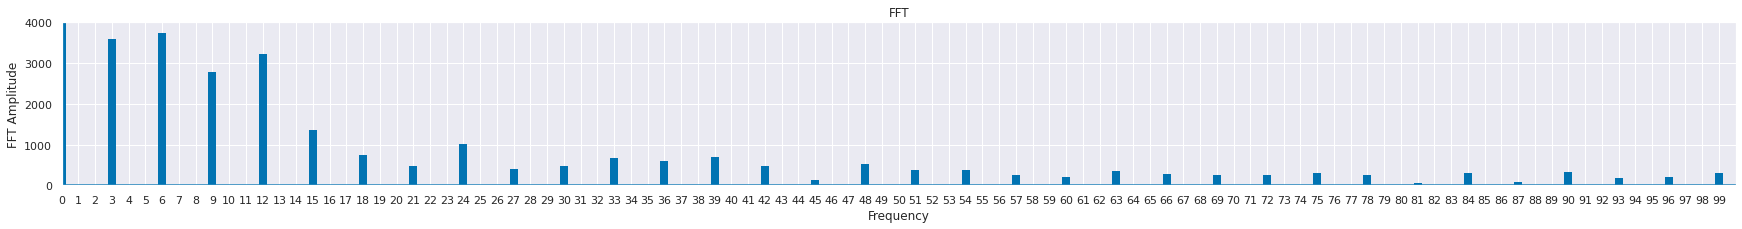

In [25]:
from numpy.fft import fft, ifft

# FFT the signal
fft_signal_C3_C3_547112 = np.array(scores_C3_C3_547112['total_score_mean'])
sig_fft_C3_C3_547112 = fft(fft_signal_C3_C3_547112)
N = len(sig_fft_C3_C3_547112)
n = np.arange(N)
# get the sampling rate
sr = 720
#sampling interval
T = N/sr
freq_C3_C3_547112 = n/T 

# plot the FFT amplitude
plt.figure(figsize = (30,3))
markerline, stemlines, baseline = plt.stem(freq_C3_C3_547112, np.abs(sig_fft_C3_C3_547112), 'b',markerfmt=" ", basefmt="-b", use_line_collection = "True")
plt.setp(stemlines, 'linewidth', 8)
plt.title('FFT')
plt.xlim(0, 100)
plt.ylim(0, 0.004e6)
plt.xticks(np.arange(min(freq_D3C3), 100, 1.0))
plt.xlabel('Frequency')
plt.ylabel('FFT Amplitude')
plt.savefig('FFT_C3_C3_547112.png')
plt.show()


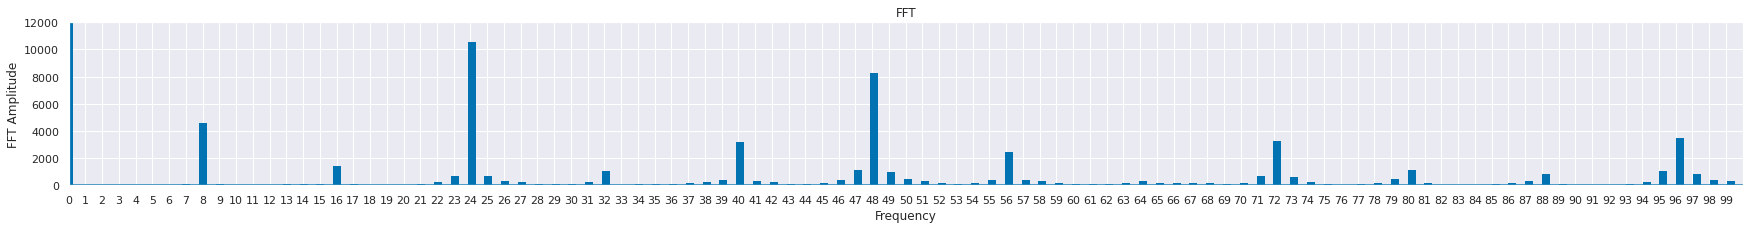

In [27]:
from numpy.fft import fft, ifft

# FFT the signal
fft_signal_D8_C4 = np.array(scores_D8_C4['total_score_mean'])
sig_fft_D8_C4 = fft(fft_signal_D8_C4)
N = len(sig_fft_D8_C4)
n = np.arange(N)
# get the sampling rate
sr = 720
#sampling interval
T = N/sr
freqD8_C4 = n/T 

# plot the FFT amplitude
plt.figure(figsize = (30,3))
markerline, stemlines, baseline =  plt.stem(freqD8_C4, np.abs(sig_fft_D8_C4), 'b',markerfmt=" ", basefmt="-b", use_line_collection = "True")
plt.setp(stemlines, 'linewidth', 8)
plt.title('FFT')
plt.xlim(0, 100)
plt.ylim(0, 0.012e6)
plt.xticks(np.arange(min(freqD8_C4), 100, 1.0))
plt.xlabel('Frequency')
plt.ylabel('FFT Amplitude')
plt.savefig('FFT_D8_C4.png')
plt.show()

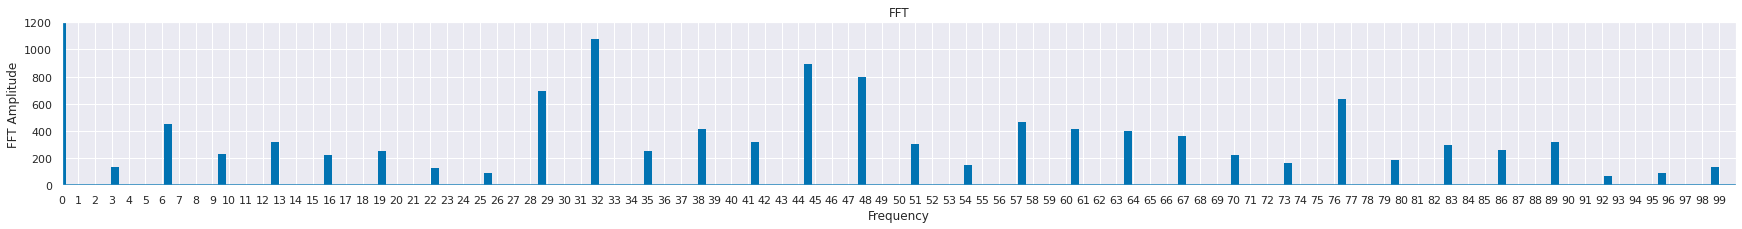

In [28]:
from numpy.fft import fft, ifft

# FFT the signal
fft_signal_C5_C3_2412 = np.array(scores_C5_C3_2412['total_score_mean'])
sig_fft_C5_C3_2412 = fft(fft_signal_C5_C3_2412)
N = len(sig_fft_C5_C3_2412)
n = np.arange(N)
# get the sampling rate
sr = 720
#sampling interval
T = N/sr
freqC5_C3_2412 = n/T 

# plot the FFT amplitude
plt.figure(figsize = (30,3))
markerline, stemlines, baseline = plt.stem(freqC5_C3_2412, np.abs(sig_fft_C5_C3_2412), 'b',markerfmt=" ", basefmt="-b", use_line_collection = "True")
plt.setp(stemlines, 'linewidth', 8)
plt.title('FFT')
plt.xlim(0, 100)
plt.ylim(0, 0.0012e6)
plt.xticks(np.arange(min(freqC5_C3_2412), 100, 1.0))
plt.xlabel('Frequency')
plt.ylabel('FFT Amplitude')
plt.savefig('FFT_C5_C3_2412.png')
plt.show()

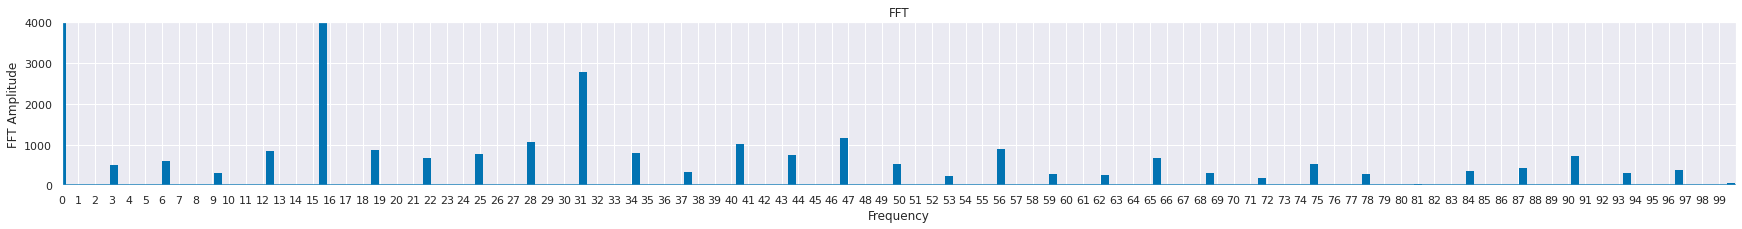

In [29]:
from numpy.fft import fft, ifft

# FFT the signal
fft_signal_C5_C3_3250 = np.array(scores_C5_C3_3250['total_score_mean'])
sig_fft_C5_C3_3250 = fft(fft_signal_C5_C3_3250)
N = len(sig_fft_C5_C3_3250)
n = np.arange(N)
# get the sampling rate
sr = 720
#sampling interval
T = N/sr
freqC5_C3_3250 = n/T 

# plot the FFT amplitude
plt.figure(figsize = (30,3))
markerline, stemlines, baseline = plt.stem(freqC5_C3_3250, np.abs(sig_fft_C5_C3_3250), 'b',markerfmt=" ", basefmt="-b", use_line_collection = "True")
plt.setp(stemlines, 'linewidth', 8)
plt.title('FFT')
plt.xlim(0, 100)
plt.ylim(0, 0.004e6)
plt.xticks(np.arange(min(freqC5_C3_3250), 100, 1.0))
plt.xlabel('Frequency')
plt.ylabel('FFT Amplitude')
plt.savefig('FFT_C5_C3_3250.png')
plt.show()


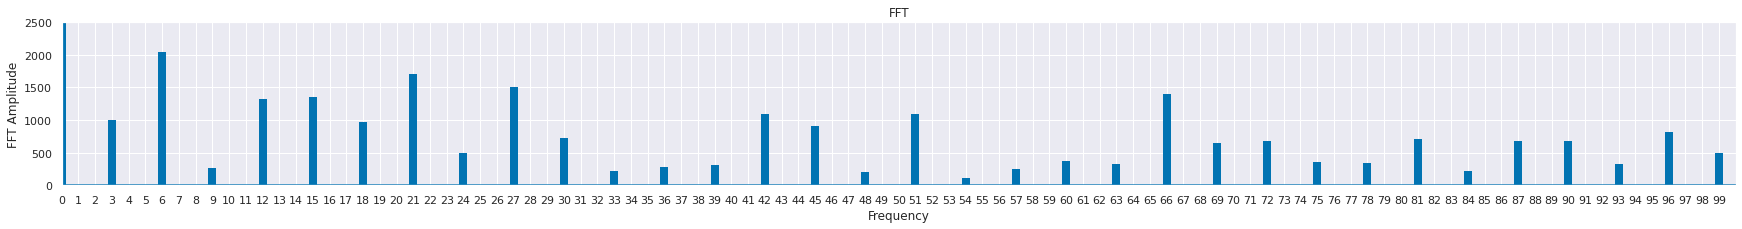

In [30]:
# FFT the signal
fft_signal_C3_C3_54736 = np.array(scores_C3_C3_54736['total_score_mean'])
sig_fft_C3_C3_54736 = fft(fft_signal_C3_C3_54736)
N = len(sig_fft_C3_C3_54736)
n = np.arange(N)
# get the sampling rate
sr = 720
#sampling interval
T = N/sr
freqC3_C3_54736 = n/T 

# plot the FFT amplitude
plt.figure(figsize = (30,3))
markerline, stemlines, baseline = plt.stem(freqC3_C3_54736, np.abs(sig_fft_C3_C3_54736), 'b',markerfmt=" ", basefmt="-b", use_line_collection = "True")
plt.setp(stemlines, 'linewidth', 8)
plt.title('FFT')
plt.xlim(0, 100)
plt.ylim(0, 0.0025e6)
plt.xticks(np.arange(min(freqC3_C3_54736), 100, 1.0))
plt.xlabel('Frequency')
plt.ylabel('FFT Amplitude')
plt.savefig('FFT_C3_C3_54736.png')
plt.show()
